In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Uploading datasets
client_profiles = pd.read_csv("//Users//natalielewis//Desktop//Ironhack//Week 5//Vanguard_Customer_Analysis//data//raw//df_final_demo.txt")
df_web_data_pt1 = pd.read_csv("/Users/natalielewis/Desktop/Ironhack/Week 5/Vanguard_Customer_Analysis/data/raw/df_final_web_data_pt_1.txt")
df_web_data_pt2 = pd.read_csv("/Users/natalielewis/Desktop/Ironhack/Week 5/Vanguard_Customer_Analysis/data/raw/df_final_web_data_pt_2.txt")
experiment_roster = pd.read_csv("/Users/natalielewis/Desktop/Ironhack/Week 5/Vanguard_Customer_Analysis/data/raw/df_final_experiment_clients.txt")
digital_footprints = pd.merge(df_web_data_pt1,df_web_data_pt2, on='client_id')

In [3]:
# Checking the dataframes

In [4]:
client_profiles.head()
# you can find the years here

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [5]:
digital_footprints.head()
# complex and heavy one 

,client_id,visitor_id_x,visit_id_x,process_step_x,date_time_x,visitor_id_y,visit_id_y,process_step_y,date_time_y
0,438567,923318467_50708963627,711884648_43943594307_585328,step_1,2017-04-05 16:06:35,694624747_14580652583,787486191_38787201768_120150,confirm,2017-06-08 16:46:39
1,438567,923318467_50708963627,711884648_43943594307_585328,step_1,2017-04-05 16:06:35,694624747_14580652583,787486191_38787201768_120150,step_3,2017-06-08 16:46:08
2,438567,923318467_50708963627,711884648_43943594307_585328,step_1,2017-04-05 16:06:35,694624747_14580652583,787486191_38787201768_120150,step_2,2017-06-08 16:45:09
3,438567,923318467_50708963627,711884648_43943594307_585328,step_1,2017-04-05 16:06:35,694624747_14580652583,787486191_38787201768_120150,step_1,2017-06-08 16:44:30
4,438567,923318467_50708963627,711884648_43943594307_585328,step_1,2017-04-05 16:06:35,694624747_14580652583,787486191_38787201768_120150,start,2017-06-08 16:44:07


In [6]:
experiment_roster.head()
# control & test group

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [7]:
# Exploring data types & missing values

In [8]:
client_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB


In [9]:
client_profiles.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [10]:
digital_footprints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160786 entries, 0 to 160785
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   client_id       160786 non-null  int64 
 1   visitor_id_x    160786 non-null  object
 2   visit_id_x      160786 non-null  object
 3   process_step_x  160786 non-null  object
 4   date_time_x     160786 non-null  object
 5   visitor_id_y    160786 non-null  object
 6   visit_id_y      160786 non-null  object
 7   process_step_y  160786 non-null  object
 8   date_time_y     160786 non-null  object
dtypes: int64(1), object(8)
memory usage: 11.0+ MB


In [11]:
digital_footprints.columns

Index(['client_id', 'visitor_id_x', 'visit_id_x', 'process_step_x',
       'date_time_x', 'visitor_id_y', 'visit_id_y', 'process_step_y',
       'date_time_y'],
      dtype='object')

In [12]:
digital_footprints['date_time_x']

0         2017-04-05 16:06:35
1         2017-04-05 16:06:35
2         2017-04-05 16:06:35
3         2017-04-05 16:06:35
4         2017-04-05 16:06:35
                 ...         
160781    2017-03-31 15:15:46
160782    2017-03-31 15:14:53
160783    2017-03-31 15:12:08
160784    2017-03-31 15:11:37
160785    2017-03-31 15:10:47
Name: date_time_x, Length: 160786, dtype: object

In [13]:
experiment_roster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  70609 non-null  int64 
 1   Variation  50500 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [14]:
experiment_roster.columns

Index(['client_id', 'Variation'], dtype='object')

In [15]:
# Merging Datasets

In [16]:
client_footprints = pd.merge(client_profiles, digital_footprints, on='client_id', how='inner')
client_footprints

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id_x,visit_id_x,process_step_x,date_time_x,visitor_id_y,visit_id_y,process_step_y,date_time_y
0,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,confirm,2017-05-06 22:41:48
1,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,step_3,2017-05-06 22:39:41
2,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,step_2,2017-05-06 22:38:09
3,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,step_1,2017-05-06 22:37:12
4,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,start,2017-05-06 22:34:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155568,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0,22703806_12091389151,582197818_99560699743_991536,step_1,2017-04-19 11:14:13,355191087_38612428309,218671552_6538580332_69944,start,2017-06-18 20:12:35
155569,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0,22703806_12091389151,582197818_99560699743_991536,start,2017-04-19 11:14:08,355191087_38612428309,218671552_6538580332_69944,step_3,2017-06-18 20:15:01
155570,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0,22703806_12091389151,582197818_99560699743_991536,start,2017-04-19 11:14:08,355191087_38612428309,218671552_6538580332_69944,step_2,2017-06-18 20:13:39
155571,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0,22703806_12091389151,582197818_99560699743_991536,start,2017-04-19 11:14:08,355191087_38612428309,218671552_6538580332_69944,step_1,2017-06-18 20:12:40


In [17]:
grouped_data = pd.merge(client_footprints, experiment_roster, on='client_id', how='inner')
grouped_data

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id_x,visit_id_x,process_step_x,date_time_x,visitor_id_y,visit_id_y,process_step_y,date_time_y,Variation
0,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,confirm,2017-05-06 22:41:48,Test
1,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,step_3,2017-05-06 22:39:41,Test
2,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,step_2,2017-05-06 22:38:09,Test
3,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,step_1,2017-05-06 22:37:12,Test
4,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,start,2017-05-06 22:34:49,Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155568,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0,22703806_12091389151,582197818_99560699743_991536,step_1,2017-04-19 11:14:13,355191087_38612428309,218671552_6538580332_69944,start,2017-06-18 20:12:35,NaN
155569,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0,22703806_12091389151,582197818_99560699743_991536,start,2017-04-19 11:14:08,355191087_38612428309,218671552_6538580332_69944,step_3,2017-06-18 20:15:01,NaN
155570,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0,22703806_12091389151,582197818_99560699743_991536,start,2017-04-19 11:14:08,355191087_38612428309,218671552_6538580332_69944,step_2,2017-06-18 20:13:39,NaN
155571,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0,22703806_12091389151,582197818_99560699743_991536,start,2017-04-19 11:14:08,355191087_38612428309,218671552_6538580332_69944,step_1,2017-06-18 20:12:40,NaN


In [18]:
# Observation - there are null values on test variation

In [19]:
# Spotting duplicates
grouped_data.duplicated().sum()

8887

In [20]:
grouped_data.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,1.555730e+05,155543.000000,155543.000000,155543.000000,155543.000000,1.555430e+05,155543.000000,155543.000000
mean,5.041359e+06,13.585253,169.027973,55.039880,2.336421,2.463716e+05,4.657837,6.829166
std,2.854246e+06,7.684740,92.005690,15.947932,0.612464,6.748682e+05,2.002529,2.103210
min,1.643000e+03,2.000000,34.000000,15.000000,2.000000,1.379134e+04,0.000000,1.000000
25%,2.564246e+06,7.000000,86.000000,45.000000,2.000000,4.923532e+04,3.000000,5.000000
50%,5.128835e+06,12.000000,155.000000,57.000000,2.000000,1.004957e+05,5.000000,7.000000
75%,7.456903e+06,19.000000,238.000000,66.000000,3.000000,2.255843e+05,6.000000,9.000000
max,9.999729e+06,54.000000,655.000000,93.000000,6.000000,1.632004e+07,7.000000,9.000000


In [21]:
# Categorical
grouped_data.select_dtypes("object").columns

Index(['gendr', 'visitor_id_x', 'visit_id_x', 'process_step_x', 'date_time_x',
       'visitor_id_y', 'visit_id_y', 'process_step_y', 'date_time_y',
       'Variation'],
      dtype='object')

In [22]:
grouped_data.select_dtypes("object").nunique().sort_values(ascending=False)

date_time_y       27698
date_time_x       27051
visit_id_x         7884
visit_id_y         7101
visitor_id_x       6066
visitor_id_y       5810
process_step_x        5
process_step_y        5
gendr                 4
Variation             2
dtype: int64

In [23]:
# Numerical to do 
# Client_id is usually CATEGORICAL
grouped_data.select_dtypes("number").columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [24]:
grouped_data.select_dtypes("number").nunique().sort_values(ascending=False)

client_id           5289
bal                 5288
clnt_tenure_mnth     402
clnt_age             152
clnt_tenure_yr        44
logons_6_mnth          9
calls_6_mnth           8
num_accts              5
dtype: int64

In [25]:
# X ? Outlier
grouped_data['gendr'].value_counts()

gendr
M    58278
F    52563
U    44693
X        9
Name: count, dtype: int64

In [90]:
# Identifying columns in the dataframe where over 80% of the values are missing
grouped_data.columns[grouped_data.isnull().mean() > 0.8]

Index([], dtype='object')

In [ ]:
grouped_data['Variation'].describe()

In [ ]:
# Seeing the A/B groups
grouped_data['Variation'].value_counts()

In [ ]:
# Questions:
1. Who are the primary clients using this online process?
 
    # gendr, bal

2. Are the primary clients younger or older, new or long-standing?

    # clnt_tenure_yr, clnt_tenure_mnth, clnt_age, 

# Exploring client data

- Who are the primary clients using this online process?
- Are the primary clients younger or older, new or long-standing?

In [91]:
"""The primary clients are 50-60 years old, 
followed by 30-40 year olds and their tenure is 
at a range of 5-15 years with Vanguard, the max amount of years 
(disregarding outliers) is 25 years"""

'The primary clients are 50-60 years old, \nfollowed by 30-40 year olds and their tenure is \nat a range of 5-15 years with Vanguard, the max amount of years \n(disregarding outliers) is 25 years'

In [ ]:
client_profiles.value_counts()

# Visualize Data

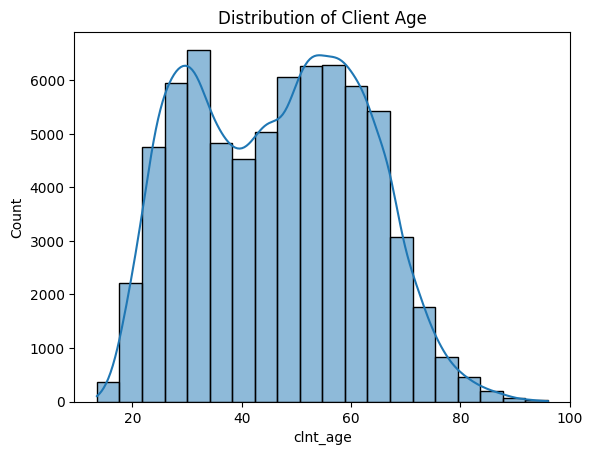

In [69]:
sns.histplot(client_profiles['clnt_age'], bins=20, kde=True)
plt.title('Distribution of Client Age')
plt.show()

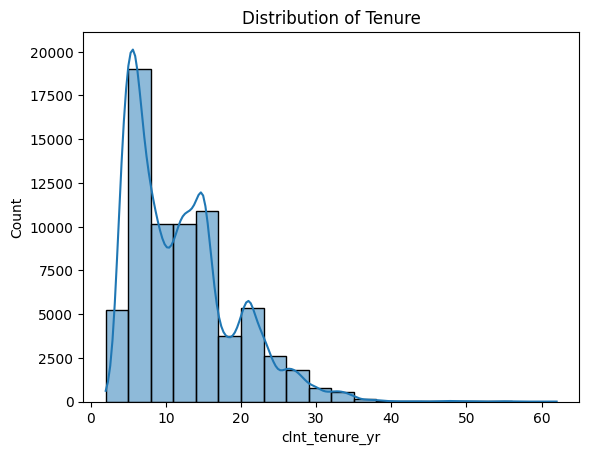

In [86]:
sns.histplot(client_profiles['clnt_tenure_yr'], bins=20, kde=True)
plt.title('Distribution of Tenure')
plt.show()

In [ ]:
# Vanguard has been around for 48 years, founded in 1975

In [71]:
# Segmenting Clients
client_profiles['age_group'] = pd.cut(client_profiles['clnt_age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

In [72]:
client_profiles['age_group']

0        60-70
1        50-60
2        30-40
3        40-50
4        30-40
         ...  
70604    30-40
70605    30-40
70606    60-70
70607    60-70
70608    50-60
Name: age_group, Length: 70609, dtype: category
Categories (6, object): ['20-30' < '30-40' < '40-50' < '50-60' < '60-70' < '70-80']

Text(0.5, 1.0, 'Distribution of Clients by Age Group')

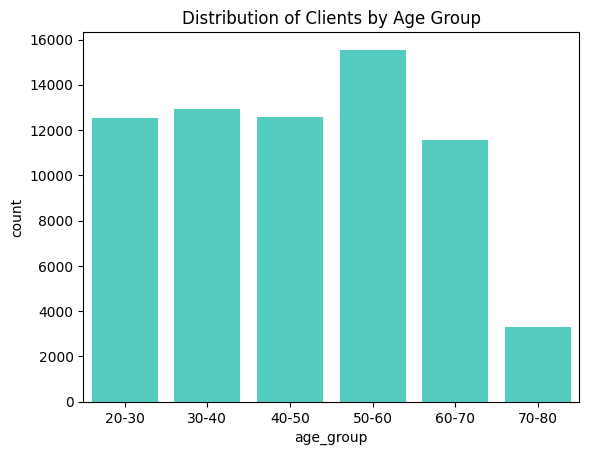

In [129]:
sns.countplot(x='age_group', data=client_profiles, color='turquoise')
plt.title('Distribution of Clients by Age Group')

In [74]:
# Exploring Client Tenure 

Text(0.5, 1.0, 'Age vs. Tenure')

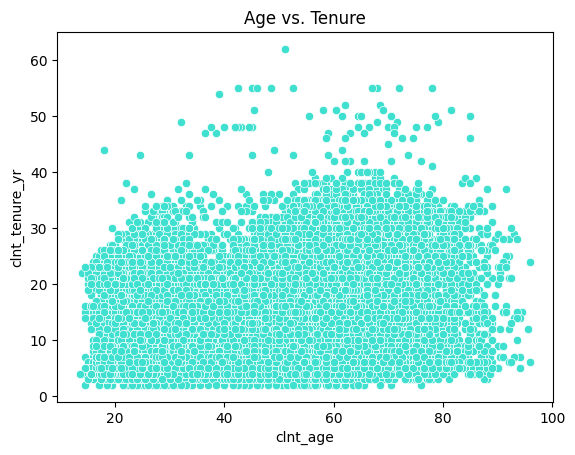

In [128]:
sns.scatterplot(x='clnt_age', y='clnt_tenure_yr', data=client_profiles, color='turquoise')
plt.title('Age vs. Tenure')

In [76]:
# Comparing the groups
"""Test age group = 27-90 with a median of 60
Control age group = <20 - 90 with a median of 50"""

Text(0.5, 1.0, 'Age Distribution by A/B Test')

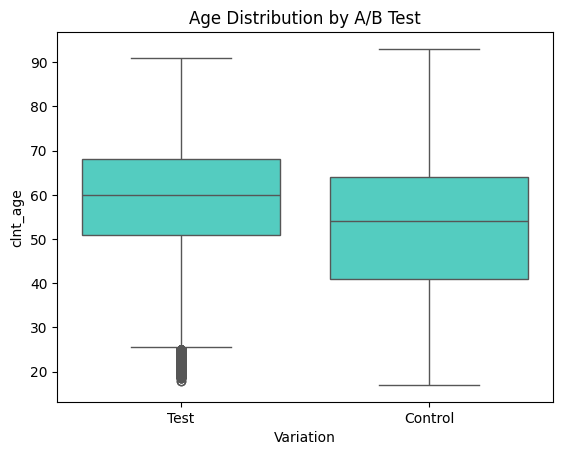

In [127]:
sns.boxplot(x='Variation', y='clnt_age', data=grouped_data, color='turquoise')
plt.title('Age Distribution by A/B Test')

# Performing Client Behavior Analysis

In [78]:
# Key Metrics

Text(0.5, 1.0, 'Number of Logons in the Last 6 Months by Variation')

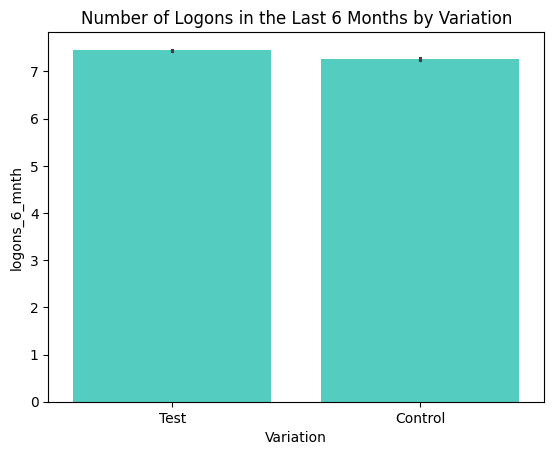

In [126]:
sns.barplot(x='Variation', y='logons_6_mnth', data=grouped_data, color='turquoise')
plt.title('Number of Logons in the Last 6 Months by Variation')

In [ ]:
# Data for login information for each group variation during A/B testing

In [ ]:
#######

In [98]:
ab_test_data = grouped_data[(grouped_data['date_time_x'] >= '2017-03-15') & (grouped_data['date_time_x'] <= '2017-06-20')]
ab_test_data

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id_x,visit_id_x,process_step_x,date_time_x,visitor_id_y,visit_id_y,process_step_y,date_time_y,Variation,month_year,age_group
0,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,confirm,2017-05-06 22:41:48,Test,2017-04-05 22:33:57,30-40
1,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,step_3,2017-05-06 22:39:41,Test,2017-04-05 22:33:57,30-40
2,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,step_2,2017-05-06 22:38:09,Test,2017-04-05 22:33:57,30-40
3,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,step_1,2017-05-06 22:37:12,Test,2017-04-05 22:33:57,30-40
4,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,start,2017-05-06 22:34:49,Test,2017-04-05 22:33:57,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155568,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0,22703806_12091389151,582197818_99560699743_991536,step_1,2017-04-19 11:14:13,355191087_38612428309,218671552_6538580332_69944,start,2017-06-18 20:12:35,NaN,2017-04-19 11:14:13,30-40
155569,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0,22703806_12091389151,582197818_99560699743_991536,start,2017-04-19 11:14:08,355191087_38612428309,218671552_6538580332_69944,step_3,2017-06-18 20:15:01,NaN,2017-04-19 11:14:08,30-40
155570,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0,22703806_12091389151,582197818_99560699743_991536,start,2017-04-19 11:14:08,355191087_38612428309,218671552_6538580332_69944,step_2,2017-06-18 20:13:39,NaN,2017-04-19 11:14:08,30-40
155571,7807844,5.0,70.0,37.0,U,2.0,493497.05,2.0,2.0,22703806_12091389151,582197818_99560699743_991536,start,2017-04-19 11:14:08,355191087_38612428309,218671552_6538580332_69944,step_1,2017-06-18 20:12:40,NaN,2017-04-19 11:14:08,30-40


In [99]:
test_data = ab_test_data[ab_test_data['Variation'] == 'Test']
test_data

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id_x,visit_id_x,process_step_x,date_time_x,visitor_id_y,visit_id_y,process_step_y,date_time_y,Variation,month_year,age_group
0,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,confirm,2017-05-06 22:41:48,Test,2017-04-05 22:33:57,30-40
1,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,step_3,2017-05-06 22:39:41,Test,2017-04-05 22:33:57,30-40
2,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,step_2,2017-05-06 22:38:09,Test,2017-04-05 22:33:57,30-40
3,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,step_1,2017-05-06 22:37:12,Test,2017-04-05 22:33:57,30-40
4,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,start,2017-05-06 22:34:49,Test,2017-04-05 22:33:57,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111074,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,903851930_50402388184,842608317_42559400580_37328,start,2017-04-05 13:15:29,69579557_2827236069,268191173_38958330991_849725,confirm,2017-05-03 19:02:25,Test,2017-04-05 13:15:29,50-60
111075,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,903851930_50402388184,61772393_69755892600_710588,confirm,2017-04-19 17:34:52,69579557_2827236069,268191173_38958330991_849725,confirm,2017-05-03 19:03:28,Test,2017-04-19 17:34:52,50-60
111076,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,903851930_50402388184,61772393_69755892600_710588,confirm,2017-04-19 17:34:52,69579557_2827236069,268191173_38958330991_849725,confirm,2017-05-03 19:02:25,Test,2017-04-19 17:34:52,50-60
111077,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,903851930_50402388184,61772393_69755892600_710588,confirm,2017-04-19 17:34:14,69579557_2827236069,268191173_38958330991_849725,confirm,2017-05-03 19:03:28,Test,2017-04-19 17:34:14,50-60


In [100]:
control_data = ab_test_data[ab_test_data['Variation'] == 'Control']
control_data

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id_x,visit_id_x,process_step_x,date_time_x,visitor_id_y,visit_id_y,process_step_y,date_time_y,Variation,month_year,age_group
150,9692048,11.0,142.0,38.0,M,2.0,87935.10,4.0,7.0,802342830_11123330949,186858310_92337592930_297543,start,2017-03-30 22:09:16,209543143_77590022058,787212719_48761920244_583197,start,2017-05-07 12:53:55,Control,2017-03-30 22:09:16,30-40
151,9692048,11.0,142.0,38.0,M,2.0,87935.10,4.0,7.0,802342830_11123330949,186858310_92337592930_297543,start,2017-03-30 22:09:16,209543143_77590022058,787212719_48761920244_583197,start,2017-05-07 12:53:47,Control,2017-03-30 22:09:16,30-40
152,9692048,11.0,142.0,38.0,M,2.0,87935.10,4.0,7.0,802342830_11123330949,186858310_92337592930_297543,start,2017-03-30 22:09:12,209543143_77590022058,787212719_48761920244_583197,start,2017-05-07 12:53:55,Control,2017-03-30 22:09:12,30-40
153,9692048,11.0,142.0,38.0,M,2.0,87935.10,4.0,7.0,802342830_11123330949,186858310_92337592930_297543,start,2017-03-30 22:09:12,209543143_77590022058,787212719_48761920244_583197,start,2017-05-07 12:53:47,Control,2017-03-30 22:09:12,30-40
154,9692048,11.0,142.0,38.0,M,2.0,87935.10,4.0,7.0,802342830_11123330949,186858310_92337592930_297543,start,2017-03-30 22:05:10,209543143_77590022058,787212719_48761920244_583197,start,2017-05-07 12:53:55,Control,2017-03-30 22:05:10,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111042,6662941,7.0,84.0,36.0,F,2.0,83101.84,4.0,7.0,848893436_64418921429,300628524_16933859013_775432,start,2017-04-05 14:08:22,594831651_23574666178,126331582_6989339765_102805,step_2,2017-06-05 16:08:12,Control,2017-04-05 14:08:22,30-40
111043,6662941,7.0,84.0,36.0,F,2.0,83101.84,4.0,7.0,848893436_64418921429,300628524_16933859013_775432,start,2017-04-05 14:08:22,594831651_23574666178,126331582_6989339765_102805,step_1,2017-06-05 16:07:55,Control,2017-04-05 14:08:22,30-40
111044,6662941,7.0,84.0,36.0,F,2.0,83101.84,4.0,7.0,848893436_64418921429,300628524_16933859013_775432,start,2017-04-05 14:08:22,594831651_23574666178,126331582_6989339765_102805,start,2017-06-05 16:07:53,Control,2017-04-05 14:08:22,30-40
111045,6662941,7.0,84.0,36.0,F,2.0,83101.84,4.0,7.0,848893436_64418921429,300628524_16933859013_775432,start,2017-04-05 14:08:22,594831651_23574666178,126331582_6989339765_102805,step_1,2017-06-05 16:05:51,Control,2017-04-05 14:08:22,30-40


In [101]:
downsampled_test_data = test_data.iloc[::5]
downsampled_test_data

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id_x,visit_id_x,process_step_x,date_time_x,visitor_id_y,visit_id_y,process_step_y,date_time_y,Variation,month_year,age_group
0,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:57,475009955_99741870924,444789517_93530657187_644985,confirm,2017-05-06 22:41:48,Test,2017-04-05 22:33:57,30-40
5,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:33:36,475009955_99741870924,444789517_93530657187_644985,confirm,2017-05-06 22:41:48,Test,2017-04-05 22:33:36,30-40
10,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,step_2,2017-04-05 22:27:04,475009955_99741870924,444789517_93530657187_644985,confirm,2017-05-06 22:41:48,Test,2017-04-05 22:27:04,30-40
15,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,step_1,2017-04-05 22:26:57,475009955_99741870924,444789517_93530657187_644985,confirm,2017-05-06 22:41:48,Test,2017-04-05 22:26:57,30-40
20,2892152,4.0,58.0,36.0,U,2.0,46815.48,5.0,8.0,475009955_99741870924,953097438_9608092216_244580,start,2017-04-05 22:26:41,475009955_99741870924,444789517_93530657187_644985,confirm,2017-05-06 22:41:48,Test,2017-04-05 22:26:41,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111055,6007167,25.0,301.0,49.5,M,2.0,64521.22,2.0,5.0,781159095_49306798956,791968544_83423427628_216281,step_1,2017-03-29 12:30:36,79594777_5039629452,588802037_33435994957_659255,confirm,2017-05-04 19:51:28,Test,2017-03-29 12:30:36,40-50
111060,6007167,25.0,301.0,49.5,M,2.0,64521.22,2.0,5.0,781159095_49306798956,791968544_83423427628_216281,start,2017-03-29 12:29:35,935631173_58845079969,207579544_80969490350_136886,confirm,2017-05-10 19:47:16,Test,2017-03-29 12:29:35,40-50
111065,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,903851930_50402388184,842608317_42559400580_37328,confirm,2017-04-05 13:23:36,69579557_2827236069,268191173_38958330991_849725,confirm,2017-05-03 19:03:28,Test,2017-04-05 13:23:36,50-60
111070,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,903851930_50402388184,842608317_42559400580_37328,step_2,2017-04-05 13:22:19,69579557_2827236069,268191173_38958330991_849725,confirm,2017-05-03 19:02:25,Test,2017-04-05 13:22:19,50-60


In [141]:
downsampled_control_data = control_data.iloc[::5]
downsampled_control_data

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id_x,visit_id_x,process_step_x,date_time_x,visitor_id_y,visit_id_y,process_step_y,date_time_y,Variation,month_year,age_group
150,9692048,11.0,142.0,38.0,M,2.0,87935.10,4.0,7.0,802342830_11123330949,186858310_92337592930_297543,start,2017-03-30 22:09:16,209543143_77590022058,787212719_48761920244_583197,start,2017-05-07 12:53:55,Control,2017-03-30 22:09:16,30-40
2172,9219098,14.0,170.0,75.0,M,2.0,290540.99,4.0,7.0,828269608_14007657919,455376479_78185778048_769073,step_1,2017-04-12 12:17:59,828269608_14007657919,566479714_17894446794_100792,start,2017-05-26 18:23:15,Control,2017-04-12 12:17:59,70-80
3746,2495191,7.0,94.0,62.0,U,2.0,556260.66,6.0,9.0,732722576_68234899743,948701422_62853158130_207325,start,2017-03-30 09:58:22,750131306_10027766892,793820058_80772931954_93412,confirm,2017-06-11 14:22:35,Control,2017-03-30 09:58:22,60-70
5557,4926147,6.0,72.0,25.0,U,2.0,37345.94,4.0,7.0,789302459_20153960813,854309142_23342822060_469911,step_2,2017-03-29 21:30:40,789302459_20153960813,860934934_51743031886_780892,start,2017-05-02 00:08:40,Control,2017-03-29 21:30:40,20-30
8274,6372964,6.0,78.0,60.0,F,2.0,35370.25,2.0,5.0,995289777_57564679057,384403604_91379402433_522614,step_3,2017-04-06 08:49:10,995289777_57564679057,538172704_90696429466_151756,step_2,2017-06-13 08:11:47,Control,2017-04-06 08:49:10,50-60
9704,2969737,20.0,247.0,65.5,M,2.0,28479.63,3.0,6.0,924529542_23682616735,665896180_63814645085_987244,step_1,2017-03-30 18:12:49,811119032_99262152967,692751001_72388421786_179958,start,2017-05-01 22:00:02,Control,2017-03-30 18:12:49,60-70
12106,5868409,20.0,244.0,64.5,M,3.0,1034687.92,5.0,8.0,635292772_95092134062,619899977_55917500963_11883,step_1,2017-03-30 12:00:02,93407859_3328593778,45515206_78483171943_353000,confirm,2017-05-18 12:46:43,Control,2017-03-30 12:00:02,60-70
14001,4581609,26.0,318.0,73.0,F,2.0,140548.75,6.0,9.0,374459183_82830545519,703447023_89013328714_962181,start,2017-04-27 19:09:18,800310449_84003071567,642638802_15607897941_620522,step_3,2017-05-15 18:12:49,Control,2017-04-27 19:09:18,70-80
15829,6305905,25.0,310.0,81.0,F,2.0,155304.58,6.0,9.0,838740366_52747142862,377783989_20092061918_513151,step_1,2017-04-12 23:41:13,838740366_52747142862,453764980_13600265258_128102,step_2,2017-05-09 16:27:52,Control,2017-04-12 23:41:13,NaN
18542,9379016,16.0,196.0,34.0,M,2.0,44498.50,6.0,9.0,102252313_79698442058,895416563_96760291506_206211,step_2,2017-04-22 23:36:13,102252313_79698442058,33392083_51402466915_328131,step_1,2017-05-21 16:29:13,Control,2017-04-22 23:36:13,30-40


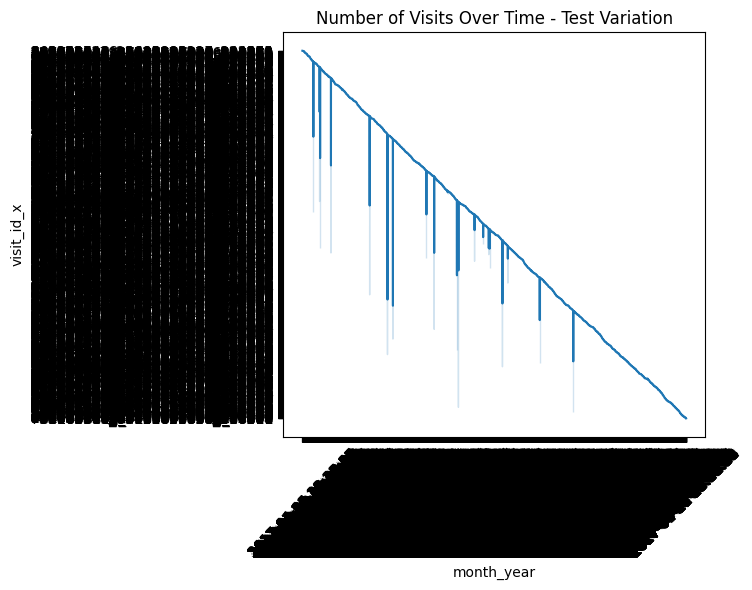

In [142]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x='month_year', y='visit_id_x', data=downsampled_test_data)
plt.title('Number of Visits Over Time - Test Variation')
plt.xticks(rotation=45)
plt.tight_layout()

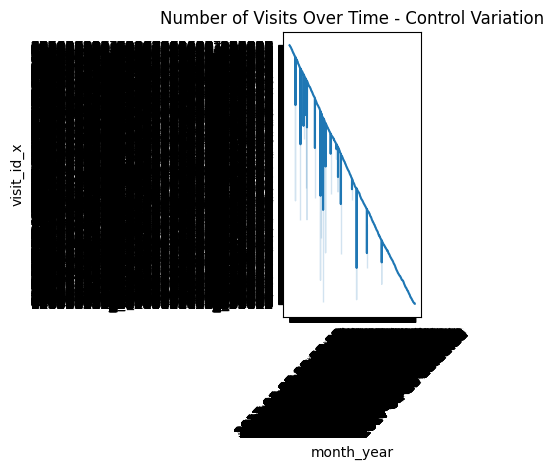

In [104]:
plt.subplot(1, 2, 2)
sns.lineplot(x='month_year', y='visit_id_x', data=downsampled_control_data)
plt.title('Number of Visits Over Time - Control Variation')
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
##########

In [105]:
conversion_rates = grouped_data.groupby('Variation')['process_step_x'].value_counts(normalize=True).unstack()
desired_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
conversion_rates = conversion_rates[desired_order]
conversion_rates

process_step_x,start,step_1,step_2,step_3,confirm
Variation,,,,,
Control,0.547151,0.201349,0.143788,0.090690,0.017021
Test,0.460464,0.240446,0.160642,0.091346,0.047104


In [119]:
custom_palette = {'start': 'green', 'step_1': 'lightgreen', 'step_2': 'turquoise', 'step_3': 'lightblue', 'confirm': 'pink'}

Text(0.5, 1.0, 'Completion Rates by Process Step and Test Group')

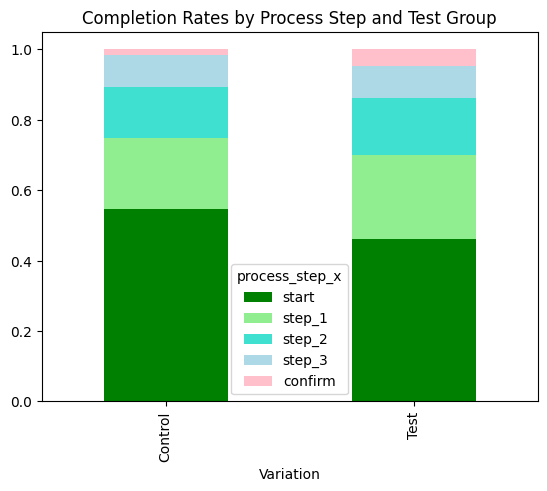

In [120]:
conversion_rates.plot(kind='bar', stacked=True, color=[custom_palette[col] for col in conversion_rates.columns])
plt.title('Conversion Rates by Process Step and Variation')
plt.title('Completion Rates by Process Step and Test Group')

In [121]:
grouped_data.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'visitor_id_x',
       'visit_id_x', 'process_step_x', 'date_time_x', 'visitor_id_y',
       'visit_id_y', 'process_step_y', 'date_time_y', 'Variation',
       'month_year', 'age_group'],
      dtype='object')

In [122]:
grouped_data['age_group'] = pd.cut(grouped_data['clnt_age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

In [123]:
grouped_data['age_group']

0         30-40
1         30-40
2         30-40
3         30-40
4         30-40
          ...  
155568    30-40
155569    30-40
155570    30-40
155571    30-40
155572    30-40
Name: age_group, Length: 155573, dtype: category
Categories (6, object): ['20-30' < '30-40' < '40-50' < '50-60' < '60-70' < '70-80']

Text(0.5, 1.0, 'Number of Logons by Age Group and Test Group')

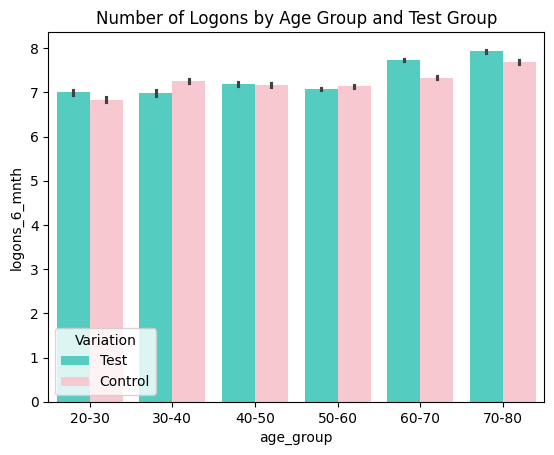

In [139]:
custom_palette = {'Test': 'turquoise', 'Control': 'pink'}

sns.barplot(x='age_group', y='logons_6_mnth', hue='Variation', data=grouped_data, palette=custom_palette)
plt.title('Number of Logons by Age Group and Test Group')

Text(0.5, 1.0, 'Distribution of Clients by Age Group')

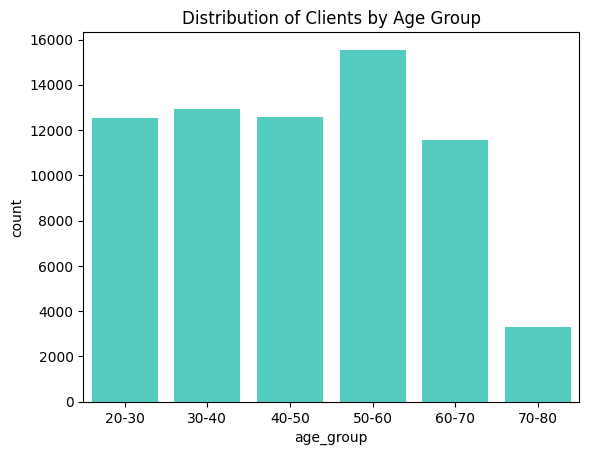

In [130]:
sns.countplot(x='age_group', data=client_profiles, color='turquoise')
plt.title('Distribution of Clients by Age Group')

In [ ]:
# check the relationship of 70-80 age group and logons

In [ ]:
# you are required to confirm if this difference is statistically significant.

# Hypothesis Testing

In [ ]:
from scipy.stats import ttest_ind
control_data = grouped_data[grouped_data['Variation'] == 'Control']
test_data = grouped_data[grouped_data['Variation'] == 'Test']

In [ ]:
t_stat, p_value = ttest_ind(control_data['logons_6_mnth'], test_data['logons_6_mnth'])
print(f'T-statistic: {t_stat}, p-value: {p_value}')